In [1]:
#run all cells sequentially 
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot
from matplotlib.patches import Rectangle
import cv2

In [2]:
def str_flt(array):
    if array == ['']:
        return []
    else:    
        z= []
        b= []
        for value in array:
            a = value[1:-1].split()
            for j in a:
                b.append(float(j))
            z.append(b)
            b=[]
        return z 

In [3]:
def str_int(array):
    z= []
    b= []
    for value in array:
        a = value[1:-1].split()
        for j in a:
            b.append(int(j))
        z.append(b)
        b=[]
    return z

In [58]:
import os

path = 'C:\\Users\\lenovo\\Desktop\\CCNY\\Face Detection\\Clip_2-Frames_12001-15000\\' # enter the path of the folder which has the images
data_list = os.listdir(path)

label = []
for file in data_list:
    if file.endswith('.png'):
        label.append(file)

In [59]:
import glob
label_name = glob.glob(path + label[0])
label_name

['C:\\Users\\lenovo\\Desktop\\CCNY\\Face Detection\\Clip_2-Frames_12001-15000\\frame_12001.png']

In [6]:
def show_img(dataset,r1,r2):      
    for k in range(r1,r2):
        label_name = glob.glob(path + label[k-1])
        char = dataset.Predicted_Classes[k-1]
        char = str_flt([char])
        box = dataset.BBox_coordinates[k-1][1:-1].split('\n ')
        box = str_flt(box)
        print(label_name)
        data = pyplot.imread(label_name[0])
        plt.imshow(data)
        for i in range(len(char[0])):
            [x1,y1,x2,y2] = box[i]
            print(box[i])
            rect = Rectangle((x1, y2), x2-x1, y1-y2, fill=False, color='red')
            plt.imshow(data)
            ax = plt.gca()
            ax.add_patch(rect)
            pyplot.show()

In [7]:
def click_event(event, x, y, flags, params):
    global x1,y1
    if event == cv2.EVENT_LBUTTONDOWN:
        # displaying the coordinates
        # on the Shell
        x1=x
        y1=y
        print(x1,' ',y1)

In [8]:
def flt_str(dataset,p,c):
    box = dataset.BBox_coordinates[p-1][1:-1].split('\n ')
    box = str_flt(box)
    box.append(c)
    
    a=[]
    for i in range(len(box)):
        a.append(box[i])
        if i < len(box)-1:
            a.append('\n ')
    b = str(a).replace
    b = str(a).replace(',','')
    b = b.replace('\\n ','\n ' )
    b = b.replace("'","")
    b = b.replace(' \n ','\n')
    return b

In [9]:
def class_edit(dataset,p,class_id):
    z = str_int([predictions.Predicted_Classes[p-1]])
    z[0].append(class_id)
    return str(z[0]).replace(',','')

In [79]:
def img_cor(path,label,dataset,r1,r2):
    for p in range(r1,r2):
        label_name = glob.glob(path + label[p-1])
        img = cv2.imread(label_name[0])

        c = []
        counter = 0
        while(1):
            cv2.imshow('{}'.format(label[p-1]), img)
            cv2.setMouseCallback('{}'.format(label[p-1]), click_event)
                             
            k = cv2.waitKey(20) & 0xFF
            if k == 27:
                break
            
            elif k == ord('a'):
                #print(x1,y1)
                c.append(x1)
                c.append(y1)
                counter +=1
                print(counter)

                if counter == 2 :
                    #print(c)
                    crd = flt_str(dataset,p,c)
                    dataset.BBox_coordinates[p-1] = crd
                    class_id = int(input('Enter class :'))
                    dataset.Predicted_Classes[p-1] = class_edit(predictions,p,class_id)
                    counter = 0 
                    c= []
                    print(dataset.Image_Name[p-1])
                    print(dataset.Predicted_Classes[p-1])
                    print(dataset.BBox_coordinates[p-1])
        
        cv2.destroyAllWindows()
        #enter the name of the copy right here
        dataset.to_csv('labelled_Clip_2-Frames_12001-15000_1.csv', index = False)

In [192]:
#enter the path to the csv file which is the copy incorrect annotations
#this will be the same as the filename in the last line of the cell above
predictions = pd.read_csv('C:\\Users\\lenovo\\Desktop\\CCNY\\Face Detection\\labelled_Clip_2-Frames_12001-15000_1.csv')

#press 'a'(lower case) to enter the coordinates after clicking twice on the image
#press 'Esc' to move on to the next image when you're done clicking/tapping coordinates of the characters in the image
img_cor(path,label,predictions,2936,2939)

265   133
1
294   108


C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2
Enter class :8


C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


frame_14936.png
[6 7 8]
[[659.52423 288.5124 698.73926 311.35318]
 [603.8746 317.07578 628.8585 343.61404]
 [265 133 294 108]]
268   140
1
297   114
2
Enter class :8
frame_14937.png
[6 7 8]
[[655.8959 288.8674 695.1358 312.09952]
 [609.27997 315.34332 637.39185 343.2694]
 [268 140 297 114]]
268   139
1
298   114
2
Enter class :8
frame_14938.png
[6 7 8]
[[656.02985 288.8154 695.11475 311.94098]
 [609.30927 315.31757 636.9824 343.09055]
 [268 139 298 114]]


['C:\\Users\\lenovo\\Desktop\\CCNY\\Face Detection\\Clip_2-Frames_12001-15000\\frame_14963.png']
[511.7572, 260.68353, 591.30804, 324.6523]


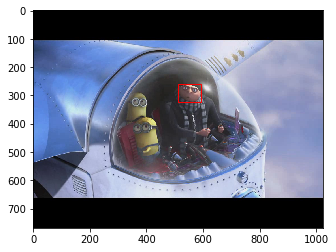

[338.43143, 297.5962, 398.9962, 396.01123]


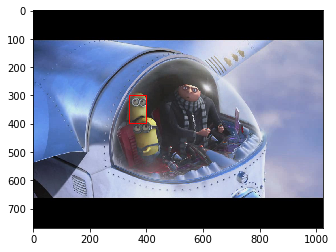

[351.10977, 342.31488, 438.7526, 513.68005]


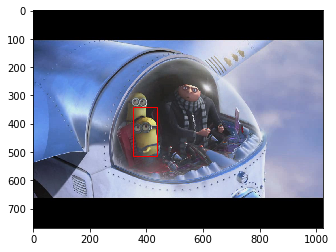

[334.24948, 299.34058, 423.48004, 476.86264]


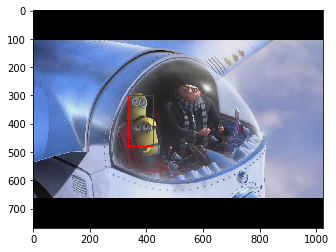

In [191]:
#use this function to check your labelling 
show_img(predictions,2963,2964)